## 相关分析
**相关分析**
<ul>
    <li>衡量事物之间或称变量之间线性相关程度的强弱，并用适当的统计指标表示出来的过程。
    <li>比如，家庭收入和支出、一个人所受教育程度与其收入、子女身高和父母身高等

**相关系数**
<ul>
    <li>衡量变量之间相关程度的一个量值。
    <li>相关系数r的数值范围是在-1到+1之间。
    <li>相关系数r的正负号表示变化方向。"+"号表示变化方向一致，即正相关:“-”号表示变化方向相反，即负相关。
    <li>r的绝对值表示变量之间的密切程度(即强度)。绝对值越接近1，表示两个变量之间关系越密切；越接近0，表示两个变量之间关系越不密切。
    <li>相关系数的值,仅仅是一个比值。它不是由相等单位度量而来(即不等距)，也不是百分比，因此，不能直接作加、减、乘、除运算。
    <li>相关系数只能描述两个变量之间的变化方向及密切程度,并不能揭示两者之间的内在本质联系,即存在相关的两个变量,不一定存在因果关系。
</ul>
<img src="assets/20201119224526.png" width="50%">

左上图是线性相关最低的，右上图是线性相关很明显的；
左下图是线性相关一般的，右下图有一定的相关但不是线性相关；

## 皮尔逊相关系数

### 连续变量的相关分析
<ul>
    <li>连续变量即数据变量，它的取值之间可以比较大小,可以用加减法计算出差异的大小。
    <li>如“年龄”、“收入”、“成绩"等变量当两个变量都是正态连续变量，而且两者之间呈线性关系时，通常用 Pearson相关系数来衡量。

### Pearson.相关系数
**协方差:**
协方差是一个反映两个随机变量相关程度的指标，如果一个变量跟随着另一个变量同时变大或者变小，那么这两个变量的协方差就是正值
$$
cov(X, Y) = \frac{\sum_n^{i=1}(X_i-\overline{X})(Y_i-\overline{Y})}{n-1}
$$

虽然协方差能反映两个随机变量的相关程度(协方差大于0的时候表示两者正相关，小于0的时候表示两者负相关)，但是协方差值的大小并不能很好地度量两个随机变量的关联程度
<br><br>在二维空间中分布着一些数据，我们想知道数据点坐标X轴和Y轴的相关程度，如果X与Y的相关程度较小但是数据分布的比较离散，这样会导致求出的协方差值较大，用这个值来度量相关程度是不合理的
<img src="assets/20201120215604.png" width="50%">
为了更好的度量两个随机变量的相关程度， 引入Pearson相关系数，其在协方差的基础上除了两个随机变量的标准差

**Pearson相关系数**
$$
P_{X,Y} = \frac{cov(X,Y)}{σXσY} = \frac{E[(X-μX)(Y-μY)]}{σXσY} 
$$
pearson是一个介于-1和1之间的值，当两个变量的线性关系增强时，相关系数趋于1或-1；当一个变量增大，另一个变量也增大时，表明它们之间是正相关的，相关系数大于0；如果一个变量增大，另一个变量却减小，表明它们之间是负相关的，相关系数小于0；如果相关系数等于0，表明它们之间不存在线性相关关系

<img src="assets/20201120220149.png" width="50%">
np.corrcoef(a)可结算行与行之间的相关系数，np.corrcoef(a,rowvar=0)用于计算各列之间的相关系数

## 计算与检验

In [2]:
import numpy as np
matrix_t = np.array([[10,10,8,9,7],
               [4,5,4,3,3],
               [3,3,1,1,1]])
matrix_t

array([[10, 10,  8,  9,  7],
       [ 4,  5,  4,  3,  3],
       [ 3,  3,  1,  1,  1]])

In [3]:
np.corrcoef(matrix_t)  # 计算行相关系数，对角线是自己与自己比较

array([[1.        , 0.64168895, 0.84016805],
       [0.64168895, 1.        , 0.76376262],
       [0.84016805, 0.76376262, 1.        ]])

In [4]:
np.corrcoef(matrix_t, rowvar=0)  # 计算列相关系数，对角线是自己与自己比较

array([[1.        , 0.98898224, 0.9526832 , 0.9939441 , 0.97986371],
       [0.98898224, 1.        , 0.98718399, 0.99926008, 0.99862543],
       [0.9526832 , 0.98718399, 1.        , 0.98031562, 0.99419163],
       [0.9939441 , 0.99926008, 0.98031562, 1.        , 0.99587059],
       [0.97986371, 0.99862543, 0.99419163, 0.99587059, 1.        ]])

计算伦敦市月平均气温与降水量
<img src="assets/20201120221030.png" width="50%">
计算伦敦市月平均气温（t）与降水量（p）之间的相关系数
$$
r_tp = \frac{\sum_{i=1}^{12}(t_i-\overline{t})(p_i-\overline{p})}
{\sqrt{\sum^{12}_{t=1}(t_i-\overline{t})^2}\sqrt{\sum^{12}_{i=1}(p_i-\overline{p})}}
=
\frac{-300.91}{\sqrt{250.55}\sqrt{1508.34}}
$$
$$
= \frac{-300.91}{15.83×38.84} = -0.4895
$$
计算结果表明，伦敦市的月平均气温（t）与降水量（p）呈负相关，即异向相关

### 相关系数的显著性检验
假设
<ul>
    <li>H0：p=0
    <li>H1：p≠0
</ul>
统计量
$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}
$$

10个学生初一数学分数与初二数学分数的相关系数为087，问从总体上来说，初一与初二数学分数是否存在相关?
<img src="assets/20201120222349.png" width="50%">
计算检验统计量：
$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} 
= \frac{0.78\sqrt{10-2}}{\sqrt{1-0.78^2}}
= 3.524
$$

$$
t = 3.524 > 3.355 = t_{(8)0.01}
$$
所以，总体来说初一和初二的成绩存在正相关。

correlation: 0.9891763198690562
pvalue: 5.926875946481138e-08


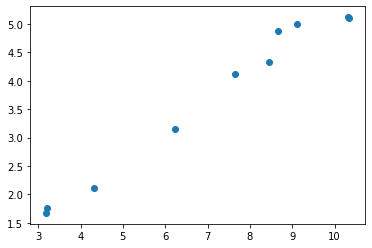

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
x = [10.35, 6.24,3.18,8.46,3.21,7.65,4.32,8.66,9.12,10.31]
y = [5.1, 3.15,1.67,4.33,1.76,4.11,2.11,4.88,4.99,5.12]
correlation, pvalue = stats.stats.pearsonr(x,y)
print('correlation:', correlation)  # 相关系数高
print('pvalue:', pvalue)
plt.scatter(x,y)
plt.show()  # 类斜线

### 斯皮尔曼等级变量的相关分析
当测量得到的数据不是等距或等比数据，而是具有等级顺序的数据；或者得到的数据是等距或等比数据，但其所来自的总体分布不是正态的，不满足求皮尔森相关系数(积差相关)的要求。这时就要运用等级相关系数。

小实验，两个基因A、B，他们的表达量关系是B=2A，在8个样本中的表达了如下：
<img src="assets/20201120223504.png" width="70%">

计算得出，他们的皮尔森相关系数=1，P-vlaue=0，从以上可以直观看出，如果两个基因的表达量呈线性关系，则具有显著的皮尔森相关性
<br><br>
以上是两个基因呈线性关系的结果。如果两者呈非线性关系，例如幂函数关系(曲线关系)，那又如何呢？
<br><br>两个基因A、D，他们的关系是D=A^10，在8个样本中的表达量值如下：
<img src="assets/20201120223836.png" width="50%">
<img src="assets/20201120223916.png" width="70%">

correlation: 0.7659287963138055
pvalue: 0.026696497208768055


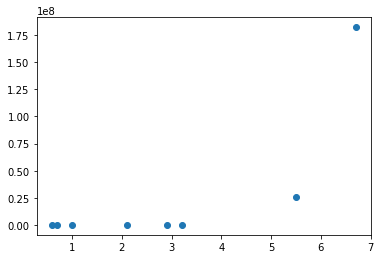

In [11]:
x = [0.6,0.7,1,2.1,2.9,3.2,5.5,6.7]
y = np.power(x, 10)
correlation, pvalue = stats.stats.pearsonr(x, y)
print('correlation:', correlation)  # 相关系数高
print('pvalue:', pvalue)
plt.scatter(x,y)
plt.show()  # 类斜线

可以看到,基因A、D相关系数，无论数值还是显著性都下降了。皮尔森相关系数是一种线性相关系数，因此如果两个变量呈线性关系的时候，具有最大的显著性。对于非线性关系(例如A、D的幂函数关系)，则其对相关性的检测功效会下降

<br>这时我们可以考虑另外一个相关系数计算方法:斯皮尔曼等级相关。

**斯皮尔曼等级相关**
当两个变量值以等级次序排列或以等级次序表示时,两个相应总体并不一定呈正态分布,样本容量也不一定大于30,表示这两变量之间的相关,称为 Spearman等级相关。

<br>简单点说,就是无论两个变量的数据如何变化，符合什么样的分布，我们只关心每个数值在变量内的排列顺序。如果两个变量的对应值，在各组内的排序顺位是相同或类似的，则具有显著的相关性。
$$
p = 1-\frac{6\sum{d^2_i}}{n^2-n}
$$
<ul>
    <li>n 为等级个数
    <li>d 为二列成对变量的等级差数

将上表转换成排序等级
<img src="assets/20201120224505.png" width="50%">

利用斯皮尔曼等级相关计算A、D基因表达量的相关性，结果是:r=1, p-value=4.96e-05

这里斯皮尔曼等级相关的显著性显然高于皮尔森相关。这是因为虽然两个基因的表达量是非线性关系，但两个基因表达量在所有样本中的排列顺序是完全相同的，因为具有极显著的斯皮尔曼等级相关性。

In [17]:
x = [10.35,6.24,3.18,8.46,3.21,7.65,4.32,8.66,9.12,10.31]
y = [5.13,3.15,1.67,4.33,1.76,4.11,2.11,4.88,4.99,5.12]
correlation, pvalue = stats.stats.spearmanr(x, y)
print('correlation:', correlation)  # 相关系数高
print('pvalue:', pvalue)

correlation: 0.9999999999999999
pvalue: 6.646897422032013e-64


In [19]:
import scipy
x = [10.35,6.24,3.18,8.46,3.21,7.65,4.32,8.66,9.12,10.31]
y = [5.13,3.15,1.67,4.33,1.76,4.11,2.11,4.88,4.99,5.12]
x = scipy.stats.stats.rankdata(x)  # 原本的数据转换成等级数据
y = scipy.stats.stats.rankdata(y)
print(x, y)  # 转换成等级后，可以看到等级是极其相似的。
# x内3.18是最小的所以是1，y内1.67是最小的所以是1，其它值同样

correlation, pvalue = stats.stats.spearmanr(x, y)
print('correlation:', correlation)  # 相关系数高
print('pvalue:', pvalue)

[10.  4.  1.  6.  2.  5.  3.  7.  8.  9.] [10.  4.  1.  6.  2.  5.  3.  7.  8.  9.]
correlation: 0.9999999999999999
pvalue: 6.646897422032013e-64


**斯皮尔曼实例**
10名高三学生学习潜在能力测验与自学能力测验成绩如下表所示，问两者相关情况如何？
<img src="assets/20201120225540.png" width="50%">
计算等级相关系数
$$
r_R = 1-\frac{2\sum D^2}{n(n^2-1)}
= 1-\frac{6×18}{10(10^2-1)}
=0.891
$$
**等级相关系数的显著性检验**
与积差相关系数检验的方法相同
10个学生学习潜在能力与自学能力测验成绩相关系数为0.891，问总体上说，两者是否存在相关？

计算检验统计量的值：
$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} 
= \frac{0.891\sqrt{10-2}}{\sqrt{1-0.891^2}}
= 5.551
$$

$$
5.551 > t_{(8)0.01} = 3.355
$$
所以学生的学习潜在学习能力与自学能力有较强的正相关。

## 肯德尔和谐系数( Kendall)
当多个(两个以上)变量值以等级次序排列或以等级次序表示，描述这几个变量之间的一性程度的量，称为肯徳尔和谐系数。
<br>它常用来表示几个评定者对同组学生成绩用等级先后评定多次之间的一致性程度。
<br>
**同一评价者无相同等级评定时,计算公式：**
$$
W = \frac{S}{\frac{1}{12}K^2(N^3-N)}
$$
<ul>
    <li>N 被评的对象数；
    <li>K 评分者人数或评分所依据的标准数；
    <li>S 每个被评对象所评等级之和Ri与所有这些和的平均数的离差平方和
$$
S=\sum^n_{i=1}(R_i-\overline{R_i})^2
= \sum^n_{i=1}R^2_i-\frac{1}{n}(\sum^n_{i=1}R_i)^2
$$
        当评分者意见完成一致时，S取得最大值，和谐系数是实际求得的S与其最大可能取值的比值，故0≤W≤1.

**同一评价者有相同等级评定时，计算公式**
<br>
$$
W = \frac{S}{\frac{1}{12}[K^2(N^3-N)-K\sum^K_{i=1}T_i]}
$$
$$
T_i = \sum^{mi}_{i=1}(n^3_{ij}-n_{ij})
$$
<ul>
    <li>mi为第i个评价者的评定结果中有重复等级的个数。
    <li>nij为第i个评价者的评定结果中第j个重复等级的相同等级数。
    <li>对于评定结果无相同等级的评价者,T=0,因此只须对评定结果有相同等级的评价者计算Ti。

**实例1:同一评价者无相同等级评定时**
某校开展学生小论文比赛，请6位教师对入选的6篇论文评定得奖等级，结果如下表所示，试计算6位教师评定结果的 kanda和谐系数

|论文编号 | 论文1  |  论文2  | 论文3  | 论文4 | 论文5  | 论文6  ||
| :----:  | :----: | :----:  | :----: | :----: | :----: | :----: |:----: |
| 老师1  | 3 | 1  | 2 | 5  | 4 | 6  | |
| 老师2  | 2 | 1  | 3 | 4  | 5 | 6  | |
| 老师3  | 3 | 2  | 1 | 5  | 4 | 6  | |
| 老师4  | 4 | 1  | 2 | 6  | 3 | 5  | |
| 老师5  | 3 | 1  | 2 | 6  | 4 | 5  | |
| 老师6  | 4 | 2  | 1 | 5  | 3 | 6  | |
| R   |19 | 8  | 11 | 31  | 23 |34| ∑K = 126  |
| R^2  | 361 | 64| 121 |961|529|1156|R^2 = 3192|

由于每个评分老师对6篇论文的评定都无相同的等级：
$$
S=\sum^6_{i=1}-\frac{1}{6}(\sum^6_{i=1}R_i)^2
= 3192- \frac{1}{6} × 126^2 = 546
$$
$$
W = \frac{S}{\frac{1}{12}K^2(N^3-N)} = \frac{546}{\frac{1}{12}6^2(6^3-6)}
=\frac{546}{630}=0.87
$$
由W=0.87表明6位老师的评定结果有较大的一致性

**实例1:同一评价者有相同等级评定时**
3名专家对6篇心理学论文的评分经等级转换下表所示,试计算专家评定结果的肯德尔和谐系数。

|论文编号 | A  |  B  | C  | D | E  | F  ||
| :----:  | :----: | :----:  | :----: | :----: | :----: | :----: |:----: |
| 甲  | 1 | 4  | 2.5 | 5  | 6 | 2.5  | |
| 乙  | 2 | 3  | 1 | 5  | 6 | 4  | |
| 丙  | 1.5 | 3  | 1.5 | 4  | 5.5 | 5.5  | |
| R   |4.5 | 10  | 5 | 14  | 17.5 |12| 63 |
| R^2  | 20.25 | 100| 25 |196|306.25|144|791.5|

由于甲、丙对6篇论文有相同等级的评定
甲T = 23-2=6
丙T = (23 - 2)+(23 - 2) = 12
$$
S=\sum^6_{i=1}-\frac{1}{6}(\sum^6_{i=1}R_i)^2
=791.5-\frac{1}{6} × 63^2 = 130.00
$$
$$
W = \frac{S}{\frac{1}{12}[K^2(N^3-N)-K\sum^K_{i=1}T_i]}
=\frac{130}{\frac{1}{12}[3^2(6^3-6)-3×(6+12)]}
=\frac{130}{153} = 0.849
$$
由W=0.849可看出专家评定结果有较大的一致性

**肯德尔和谐系数的显著性检验**
评分者人数(k)在3-20之间，被评者(N)在3-7之间时，可查《肯德尔和谐系数(w)显著性临界值表》，检验W是否达到显著性水平。若实际计算的S值大于k、N相同的表内临界值，则W达到显著水平

当K=6N=6，查表得检验水平分别为α=0.01，α=0.05的临界值各为S0.01=282.4,S0.05=221.4，均小于实算的S=546，故W达到显著水平，认为6位教师对6篇论文的评定相当一致

当被评者n>7时，则可用如下的X2统计量对W是否达到显著水平作检验。

In [3]:
x1 = [10,9,8,7,6]
x2 = [10,8,9,6,7]

tau, p_value = stats.kendalltau(x1,x2)
print('tau', tau)
print('p_value', p_value)

tau 0.6
p_value 0.23333333333333334


## 质量相关分析
质量相关是指一个变量为质，另一个变量为量，这两个变量之间的相关。如智商、学科分数、身高、体重等是表现为量的变量，男与女、优与劣、及格与不及格等是表现为质的变量。

质与量的相关主要包括二列相关、点二列相关、多系列相关。

###  二列相关
当两个变量都是正态连续变量。其中一个变量被人为地划分成二分变量(如按一定标推将属于正态连续变量的学科考试分数划分成及格与不及格,录取与未录取,把某一体育项目测验结果划分成通过与未通过,达标与末达标,把健康状况划分成好与差,等等),表示这两个变量之间的相关,称为二列相关

**二列相关的使用条件:**
<ul>
    <li>两个变量都是连续变量,且总体呈正态分布,或总体接近正态分布,至少是单峰对称分布。
    <li>两个变量之间是线性关系。
    <li>二分变量是人为划分的,其分界点应尽量靠近中值。
    <li>样本容量应当大于80。
</ul>
$$
R = \frac{\overline{X}_p-\overline{X}_q}{σ} × \frac{pq}{Y}
$$

$$p 表示二分变量中某一类别频数的比率$$
$$q 表示二分变量中另一类别频数的比率$$
$$\overline{X}_p 表示与二分变量中p类别相对应的连续变量的平均数$$
$$\overline{X}_q 表示与二分变量中q类别相对应的连续变量的平均数$$
$$σ 表示连续变量的标准差$$
$$Y 表示正态曲线下与p相对应的纵线高度$$

**二列相关实例：**
<br>10名考生成绩如下，包括总分和一道问答题，试求该问答题的区分度（6分以上为通过，包括6分）
<img src="assets/20201121183005.png" width="50%">
问答题，被人为的分成两类，通过和不通过，应求二列相关。
<br>
$$
当p=0.6时，查正态分布表得到：x=0.25
$$
$$
当x=0.25时，代入标准正态密度函数Y=\frac{1}{\sqrt{2π}}e^{-\frac{x^2}{x}}
得到：Y=0.3866
$$
$$
\overline{X}_p = 67.33, \overline{X}_q=61.25,σ=6.12
$$
则可以通过公式计算得到二列相关系数：
$$
R=\frac{\overline{X}_p-\overline{X}_q}{σ}×\frac{pq}{Y}
=\frac{67.33-61.25}{6.12}×\frac{0.6×0.4}{0.3866} ≈0.62
$$
区分度较高

### 点二列相关
当两个变量其中一个是正态连续性变量,另一个是真正的二分名义变量(例如,男与女,已婚和未婚,色肓与非色盲,生与死,等等),这时,表示这两个变量之间的相关,称为点二列相关。
$$
R = \frac{\overline{X}_p-\overline{X}_q}{σ} × \sqrt{pq}
$$

$$p表示二分变量中某一类别频数的比率$$
$$q 表示二分变量中另一类别频数的比率$$
$$\overline{X}_p 表示与二分变量中p类别相对应的连续变量的平均数$$
$$\overline{X}_q 表示与二分变量中q类别相对应的连续变量的平均数$$
$$σ 表示连续变量的标准差$$

**点二列相关实例：**
<br>有50道选择题,每题2分,有20人的总成绩和第五题的情况,第五题与总分的相关程度如亻
<img src="assets/20201121183858.png" width="50%">
p(答对学生的比例) = 10/20=0.5，q=1-p=0.5
$$
\overline{X}_p=88.4, \overline{X}_q=74.8, σ=8.66
$$
$$
R = \frac{\overline{X}_p-\overline{X}_q}{σ} × \sqrt{pq}
= \frac{88.4-74.8}{8.66}\sqrt{0.5×0.8} = 0.785
$$
相关系数较高，第五题的情况与总分有一致性（区分度较高）

In [7]:
#拿上面的实例，对了就是1，错了是0，x是第5题的选答情况，y是分数
x = [1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0]
y = [84,82,76,60,72,74,76,84,88,90,78,80,92,94,96,88,90,78,76,74]
stats.pointbiserialr(x,y)  #可以看到相关系数值是0.7849，和上面的计算结果一致

PointbiserialrResult(correlation=0.7849870641173371, pvalue=4.145927973490392e-05)